Heart Failure Detection - Using machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
#load credit card dataset
df=pd.read_csv('heart_main.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

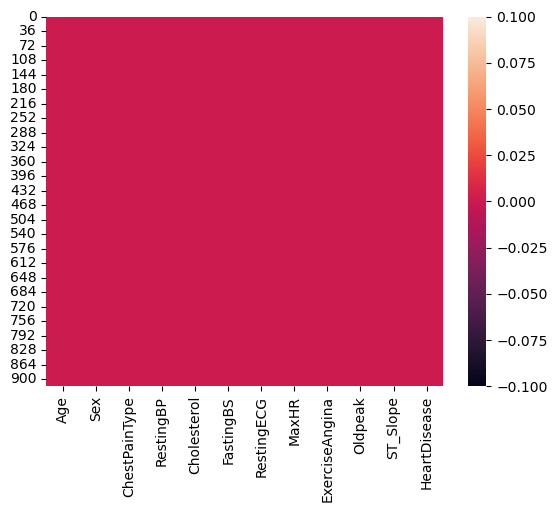

In [6]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.shape

(918, 12)

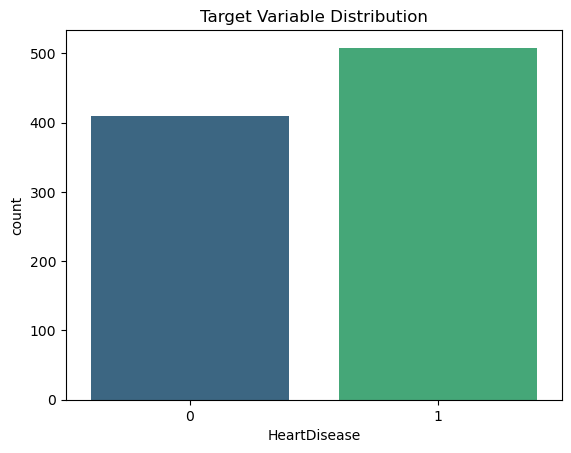

In [9]:
#here there is no null values but contains categorical variables
# Visualize the target variable distribution to check data balance or not.
sns.countplot(x=df['HeartDisease'], palette="viridis")
plt.title("Target Variable Distribution")
plt.show()


In [10]:
#separate object type columns and numerical columns in two different datasets to handle categorical data
df1=df.select_dtypes(object)
df2=df.select_dtypes(['float','int64'])
print('Categorical dataset ')
print(df1.info())
print('Numerical dataset ')
print(df2.info())

Categorical dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB
None
Numerical dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: flo

In [11]:
#use LabelEncoder to convert categorical datatype into nymerical data type
from sklearn.preprocessing import LabelEncoder
for col in df1:
    obj=LabelEncoder()
    df1[col]=obj.fit_transform(df1[[col]])

In [12]:
df1.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


Age
Skewness 
 -0.19561273124487544


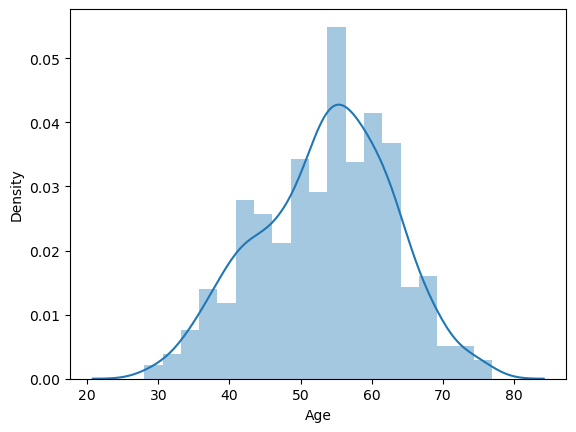

RestingBP
Skewness 
 0.17954532149156327


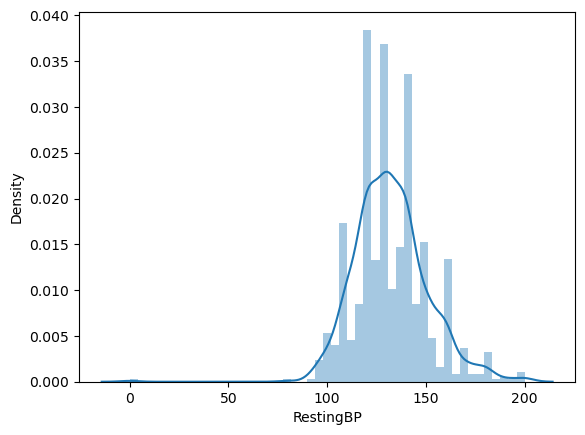

Cholesterol
Skewness 
 -0.6090891046626045


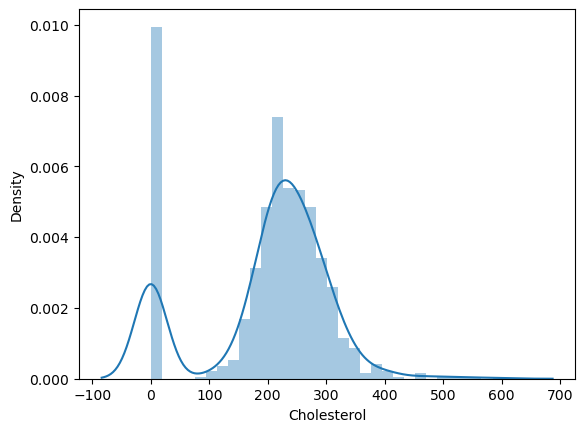

FastingBS
Skewness 
 1.2624170859488144


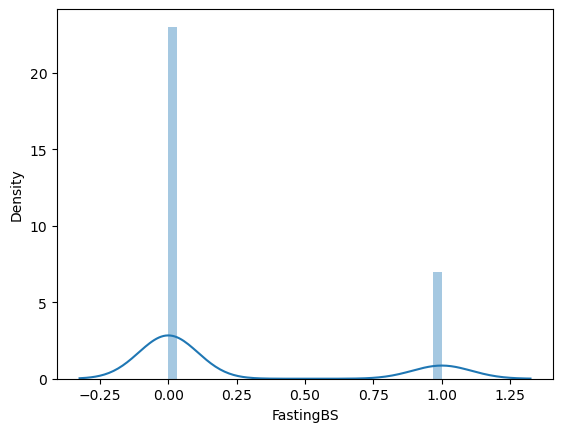

MaxHR
Skewness 
 -0.14412342991429325


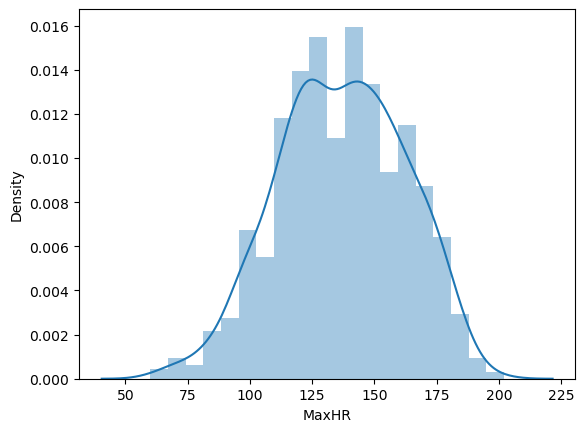

Oldpeak
Skewness 
 1.0211999031135828


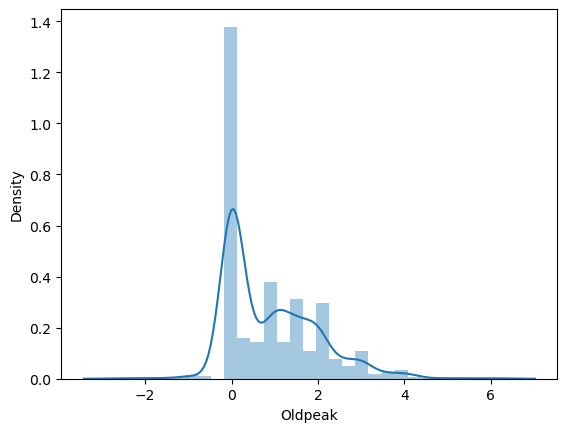

HeartDisease
Skewness 
 -0.21473473034684154


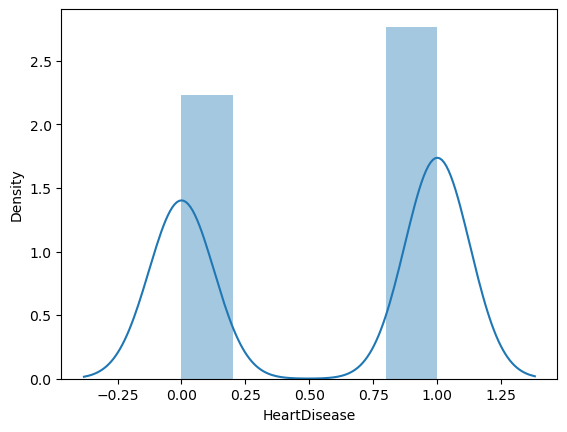

In [13]:
#check skewness for numerical dataset
from scipy.stats import skew
for col in df2:
    print(col)
    print('Skewness \n',skew(df2[col]))
    sns.distplot(df2[col])
    plt.show()

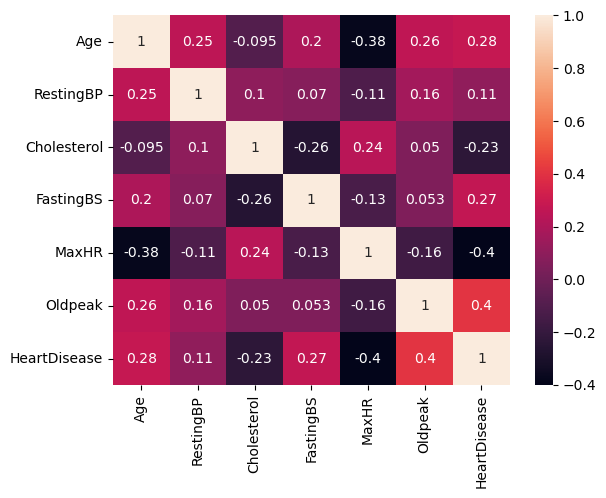

In [14]:
#to reduce skewness we check for correlation coefficient
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [15]:
#combine two datasets
df_new=pd.concat([df1,df2],axis=1)
df_new.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [16]:
X=df_new.drop('HeartDisease',axis=1)#input variables
Y=df_new['HeartDisease']#target variable

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
#scaling
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x_train=obj.fit_transform(x_train)
x_test=obj.transform(x_test)

In [19]:
print('Original Dataset size : ',df_new.shape)
print('Training input dataset size : ', x_train.shape)
print('Training output dataset size : ', y_train.shape)
print('Testing input dataset size : ', x_test.shape)
print('Testing output dataset size : ', y_test.shape)

Original Dataset size :  (918, 12)
Training input dataset size :  (642, 11)
Training output dataset size :  (642,)
Testing input dataset size :  (276, 11)
Testing output dataset size :  (276,)


In [20]:
#create user defined function
def fit_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Confusion Matrix ')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return model

1.Logistic Regression

In [21]:
#create object of LogisticRegression class
lr=LogisticRegression()
#fit model
lr=fit_model(lr) #calling user defined function

Confusion Matrix 
[[ 96  13]
 [ 24 143]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



In [22]:
#Here Accuracy using Logistic Regression is good i.e.0.87
#but apply other models to check for best accuracy

2.Ensembling Techniques - Random forest

In [23]:
#create object of class RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
rfc=fit_model(rfc)

Confusion Matrix 
[[ 89  20]
 [ 38 129]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       109
           1       0.87      0.77      0.82       167

    accuracy                           0.79       276
   macro avg       0.78      0.79      0.79       276
weighted avg       0.80      0.79      0.79       276



In [24]:
#using RandomForestClassifier accuracy is 0.79
#which is less than LogisticRegression

-Extreme Gradient Boosting (XGB)

In [25]:
#create object of class XGBClassifier
xgb=XGBClassifier(n_estimators=25,reg_alpha=1)
xgb=fit_model(xgb)

Confusion Matrix 
[[ 94  15]
 [ 24 143]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



'''using XGBClassifier accuracy is 0.86, which is less than LogisticRegression that means Logistic regression gives better accuracy'''

#Removing Feature

In [26]:
#since correlation very weak for RestingBP drop it
df_new = df_new.drop('RestingBP',axis=1)
X=df_new.drop('HeartDisease',axis=1)#input variables
Y=df_new['HeartDisease']#target variable

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
#scaling
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x_train=obj.fit_transform(x_train)
x_test=obj.transform(x_test)

In [29]:
#create object of LogisticRegression class
lr=LogisticRegression()
#fit model
lr=fit_model(lr) #calling user defined function

Confusion Matrix 
[[ 95  14]
 [ 22 145]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.91      0.87      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [30]:
#Here Accuracy using Logistic Regression is good i.e.0.87
#but apply other models to check for best accuracy

In [31]:
#create object of class RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
rfc=fit_model(rfc)

Confusion Matrix 
[[ 89  20]
 [ 38 129]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       109
           1       0.87      0.77      0.82       167

    accuracy                           0.79       276
   macro avg       0.78      0.79      0.79       276
weighted avg       0.80      0.79      0.79       276



In [32]:
#using RandomForestClassifier accuracy is 0.79
#which is less than LogisticRegression

In [33]:
#create object of class XGBClassifier
xgb=XGBClassifier(n_estimators=25,reg_alpha=1)
xgb=fit_model(xgb)

Confusion Matrix 
[[ 93  16]
 [ 16 151]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.90      0.90      0.90       167

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



'''Using XGBClassifier accuracy is 0.88 ,which is more than LogisticRegression and random forest that means XGBClassifier gives better accuracy'''

In [34]:
#####################################################################